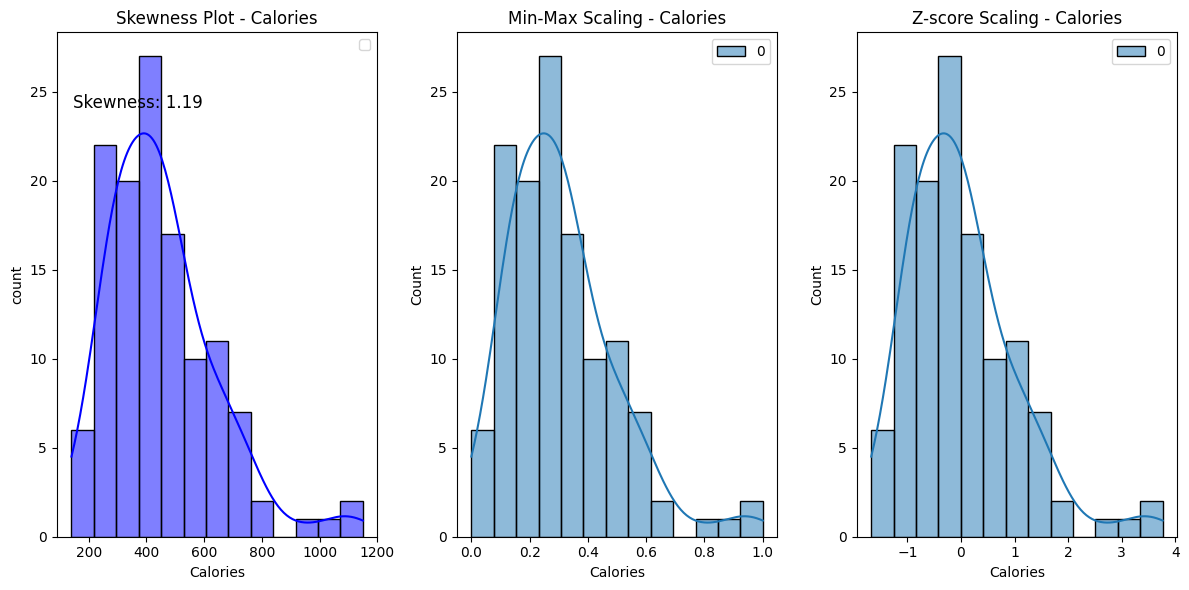

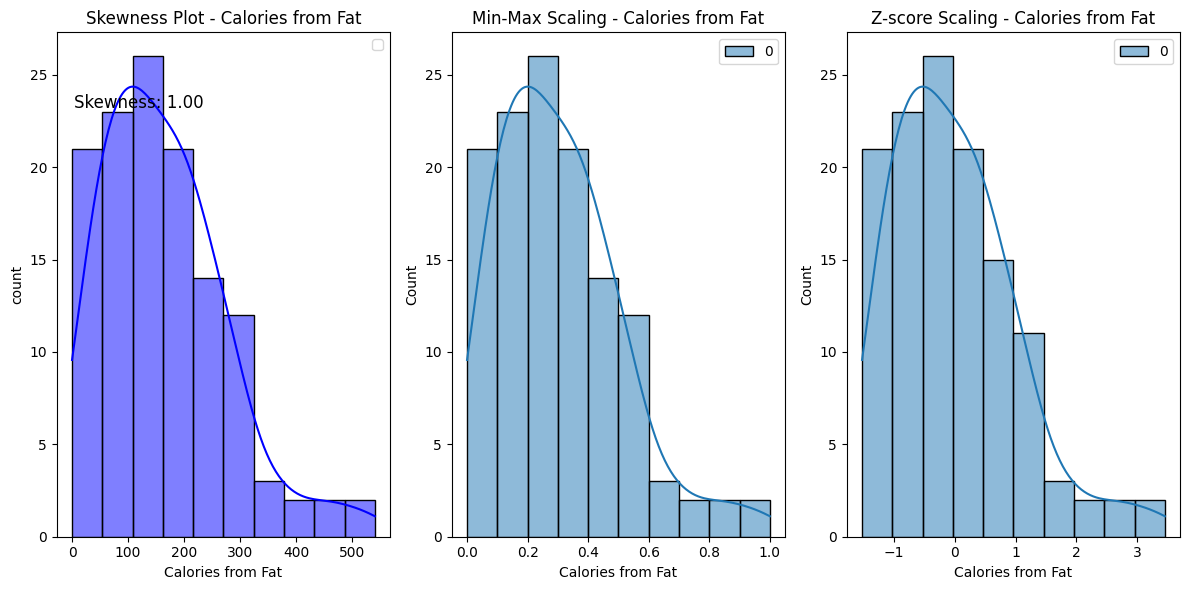

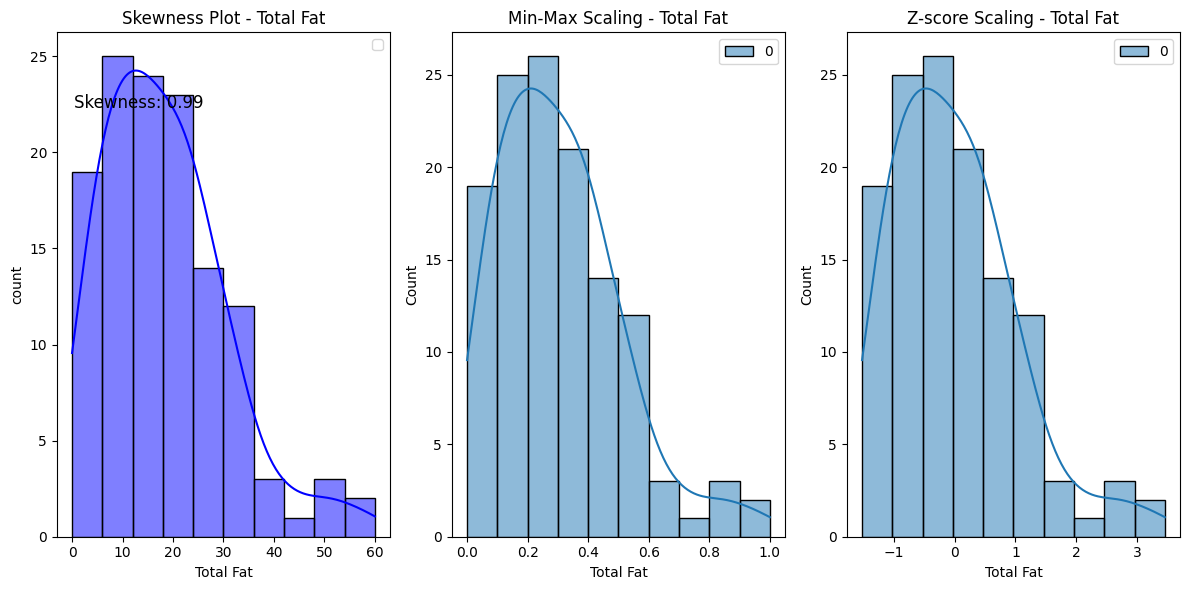

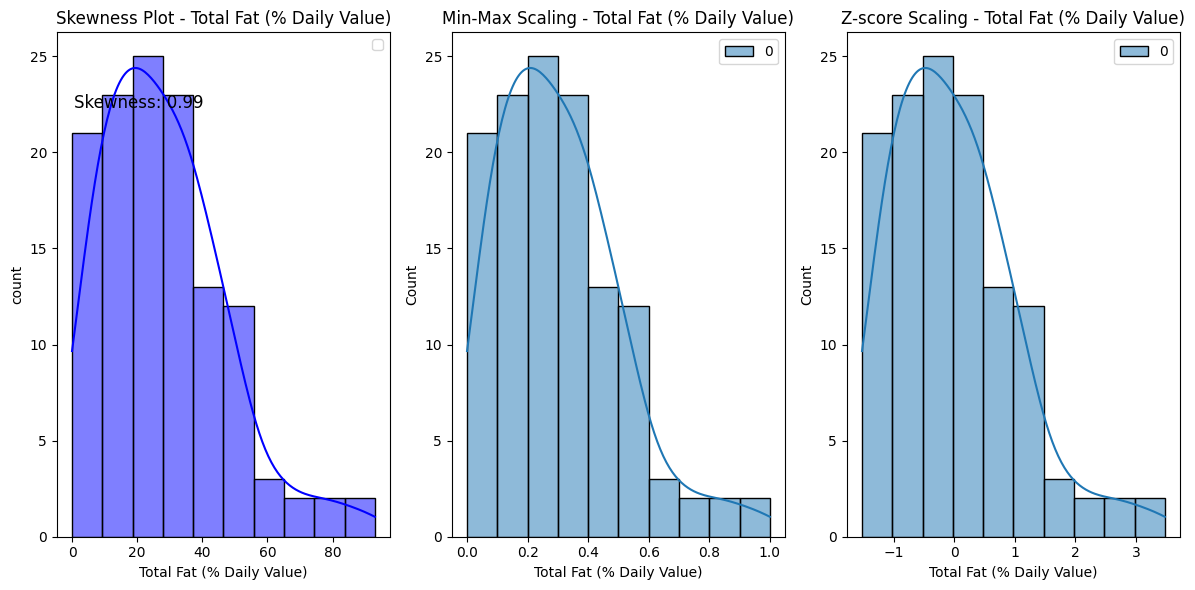

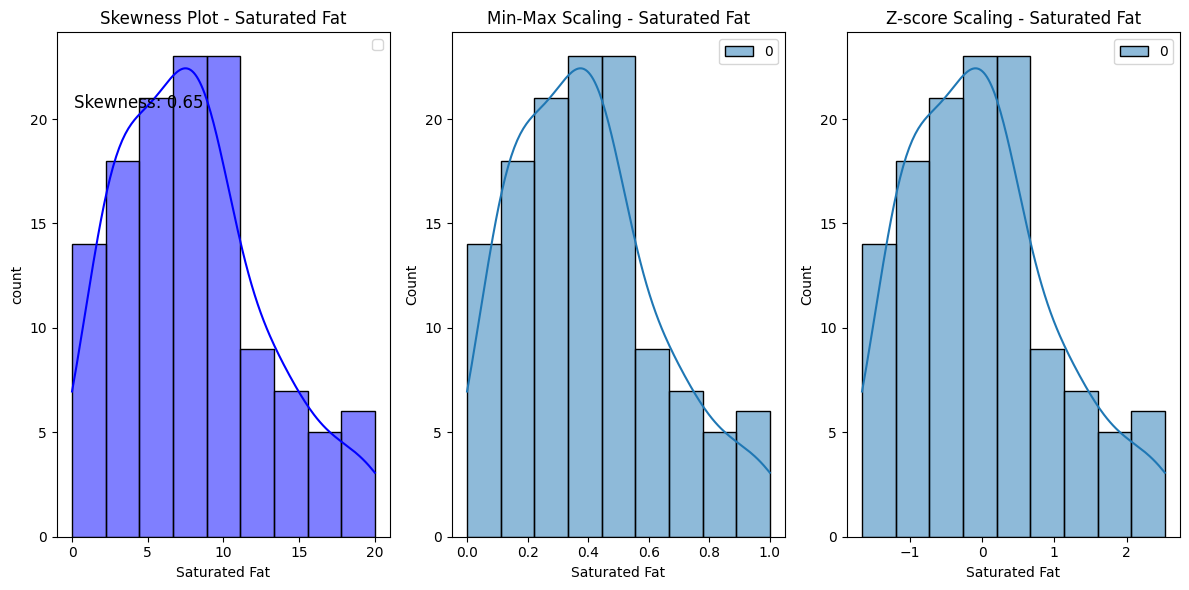

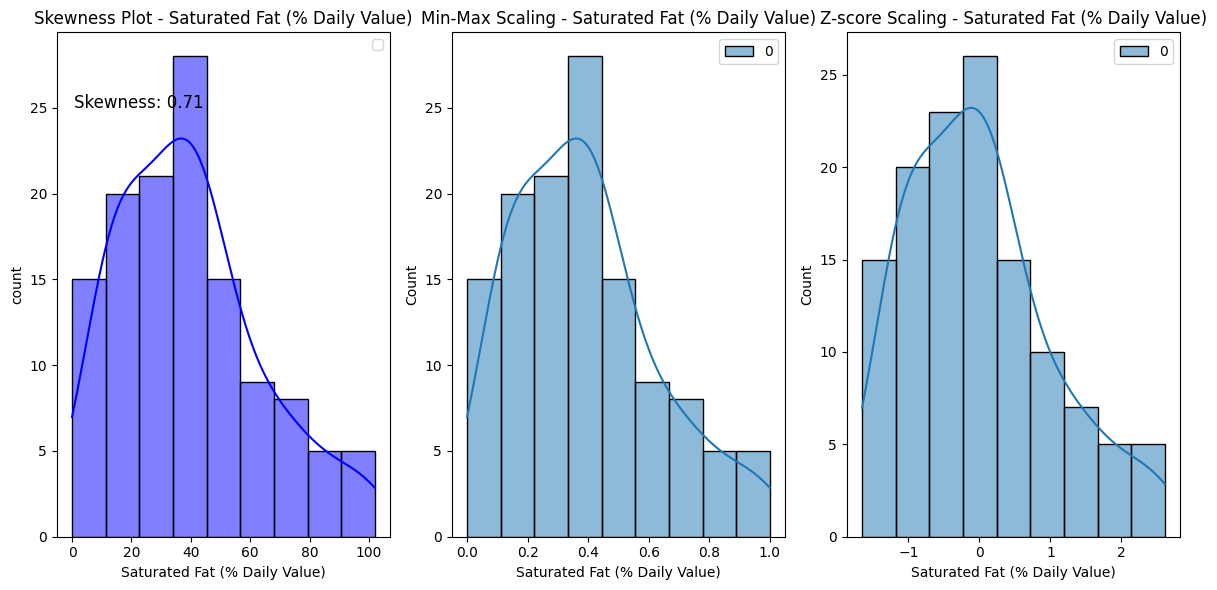

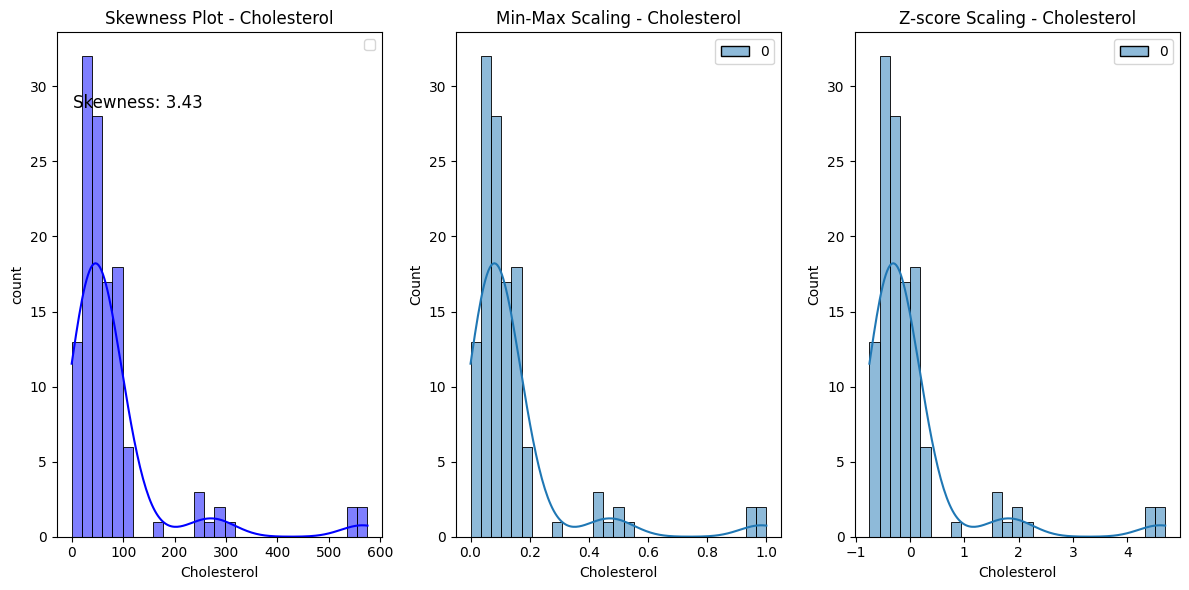

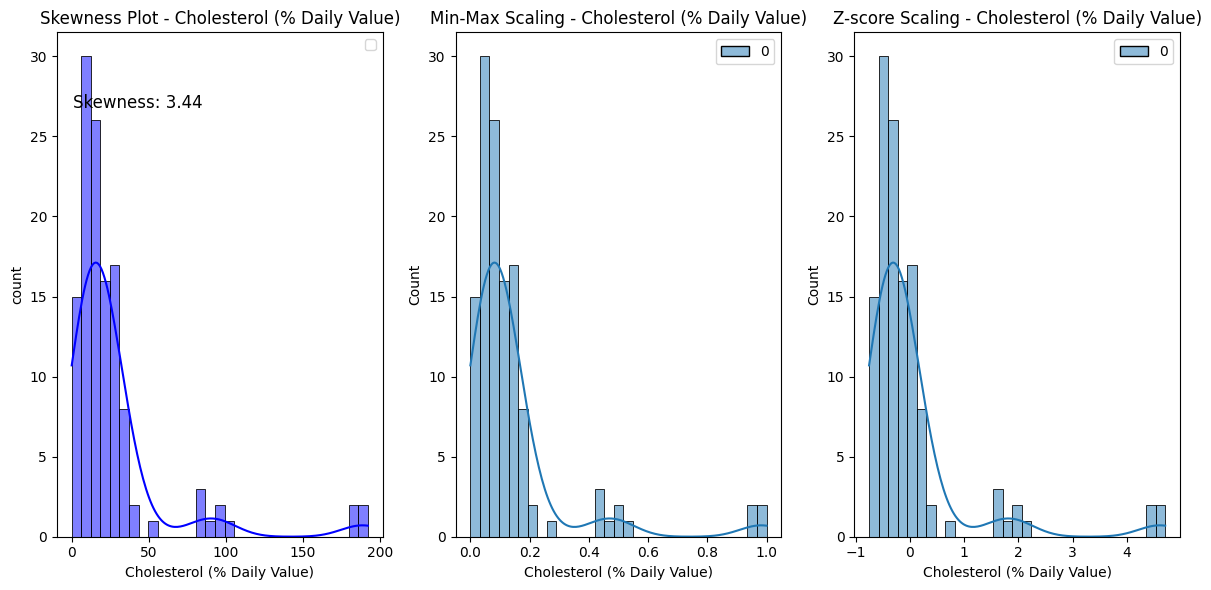

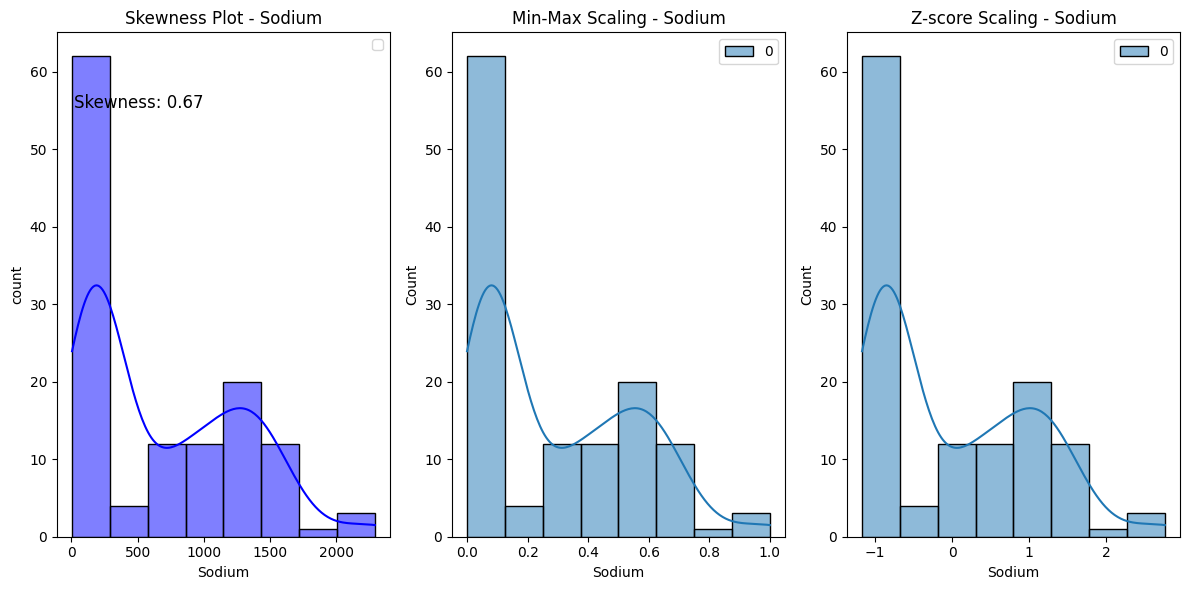

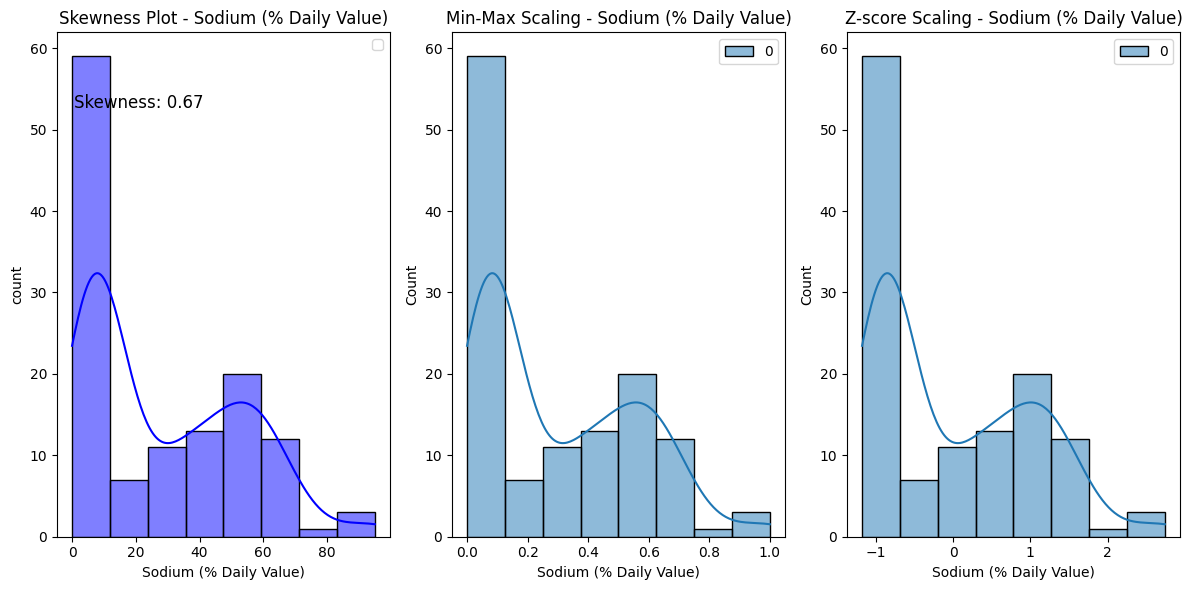

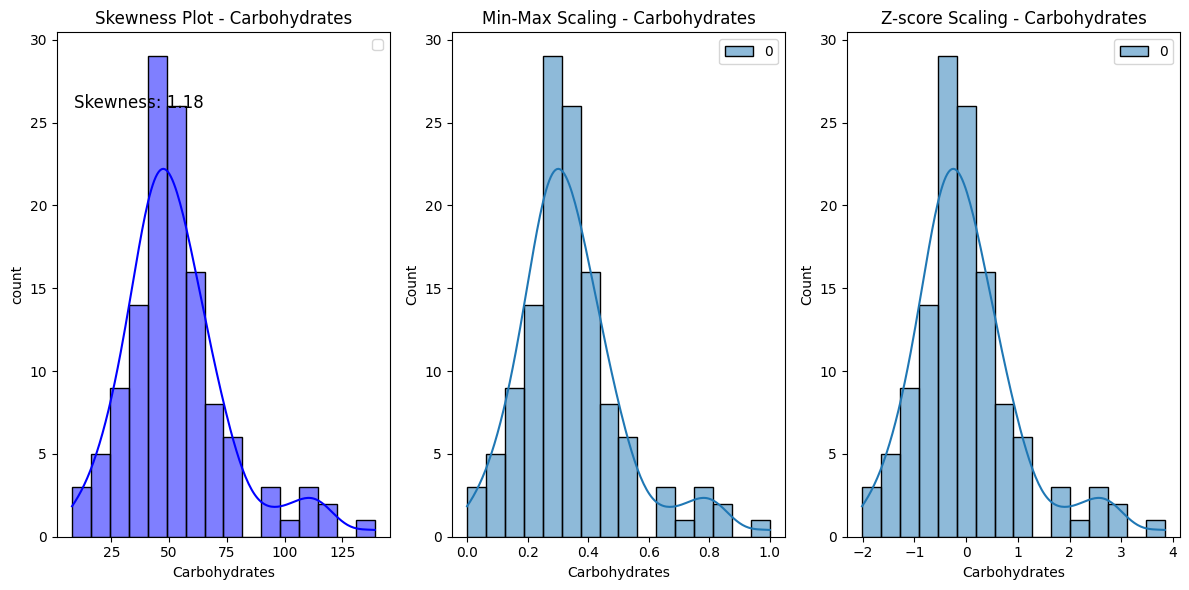

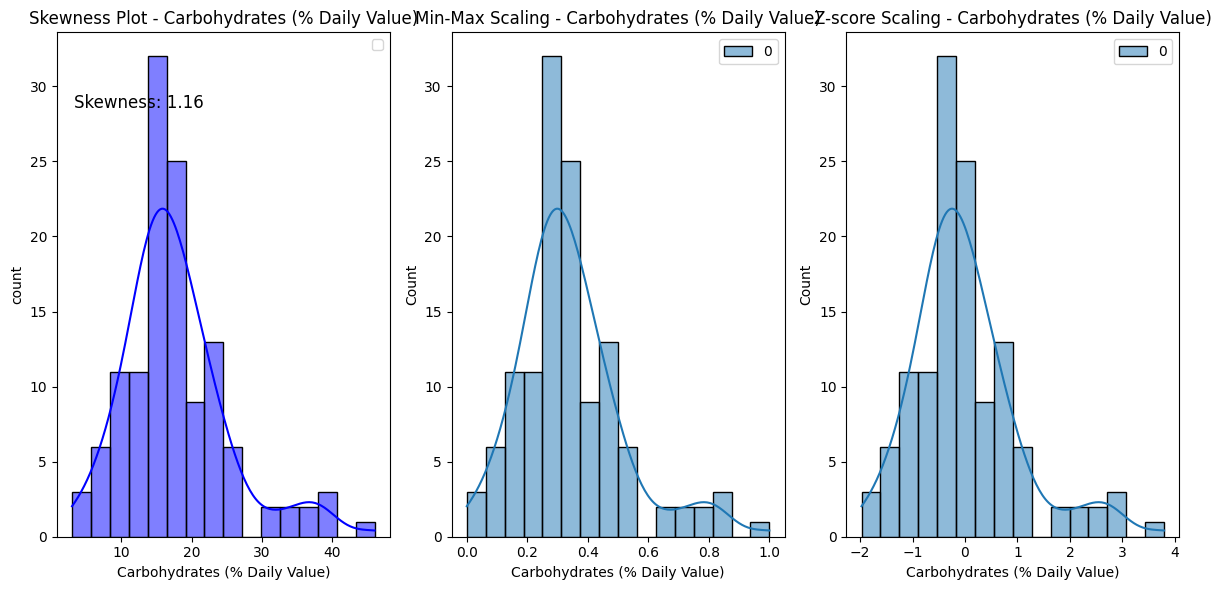

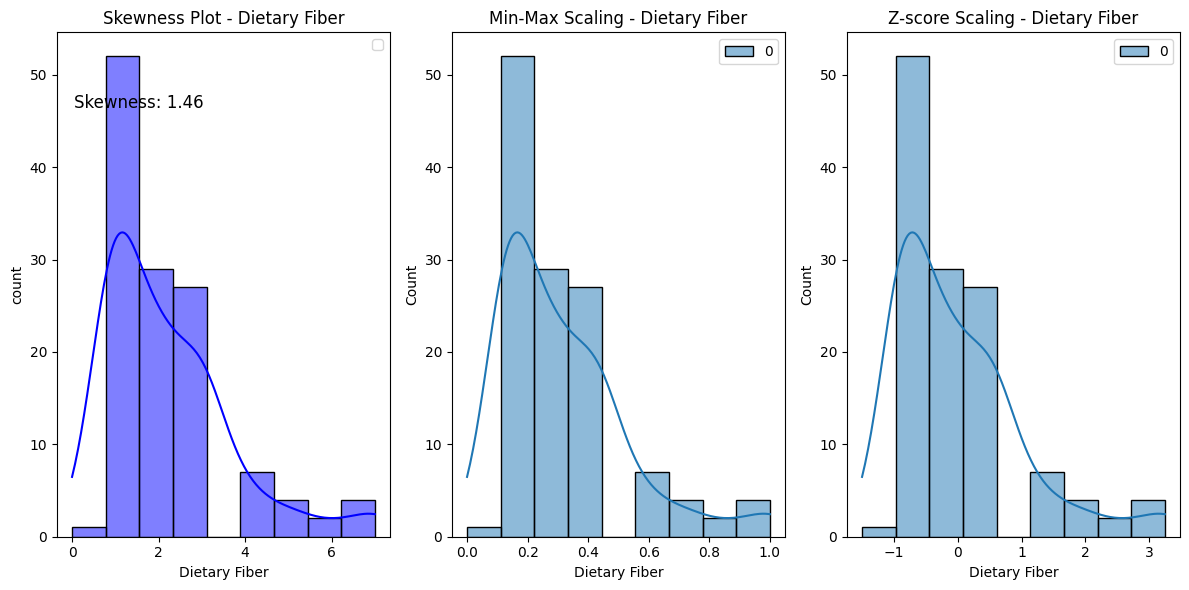

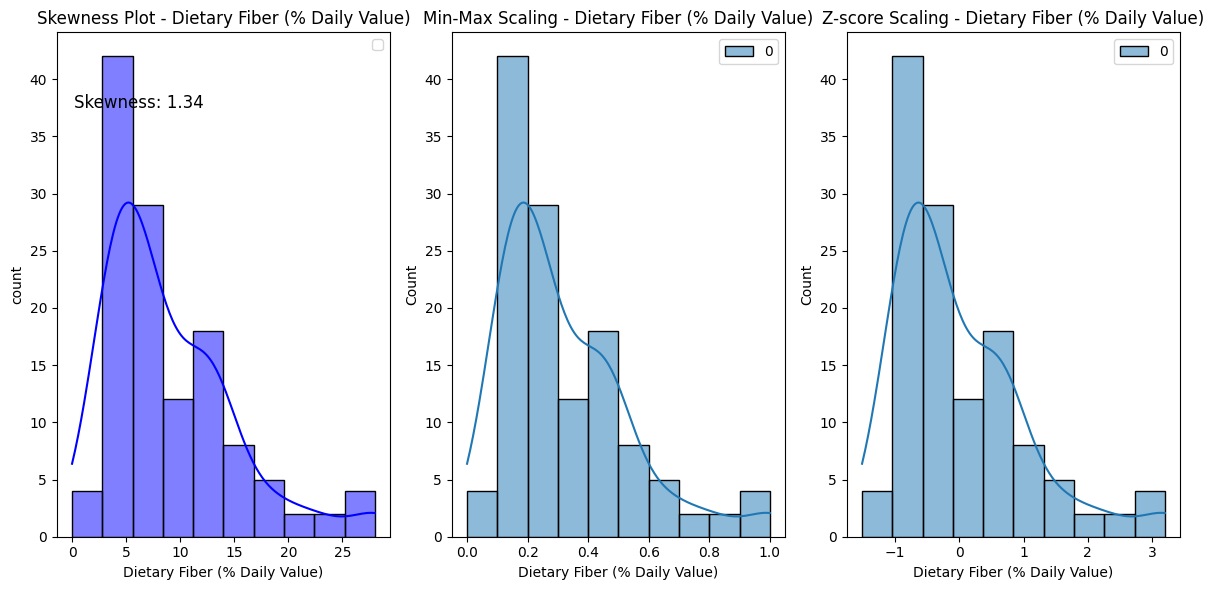

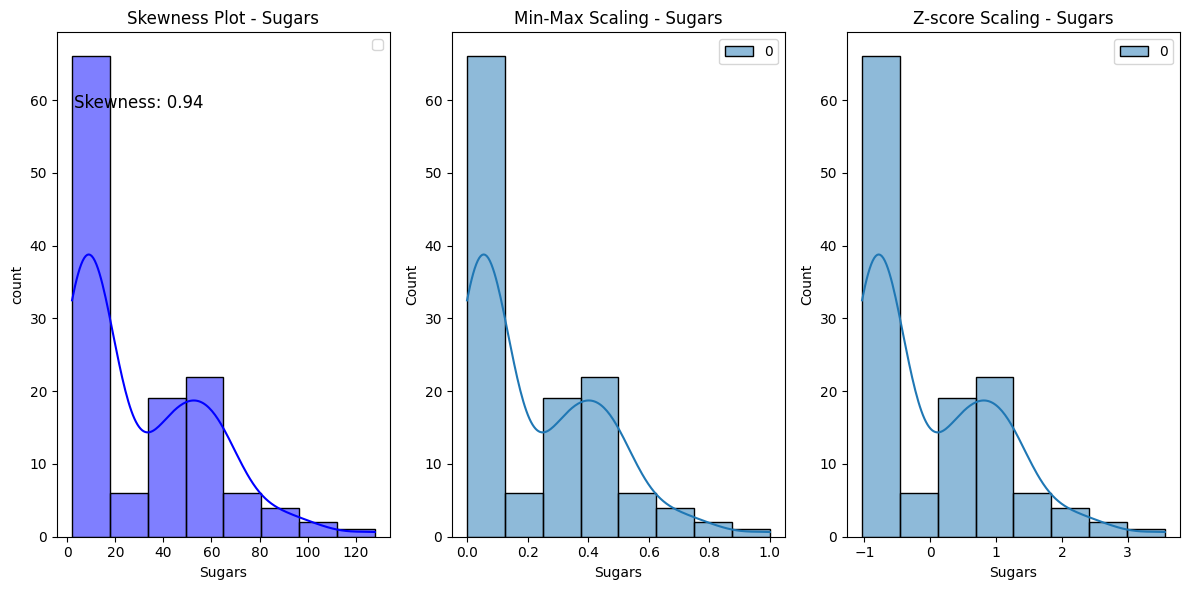

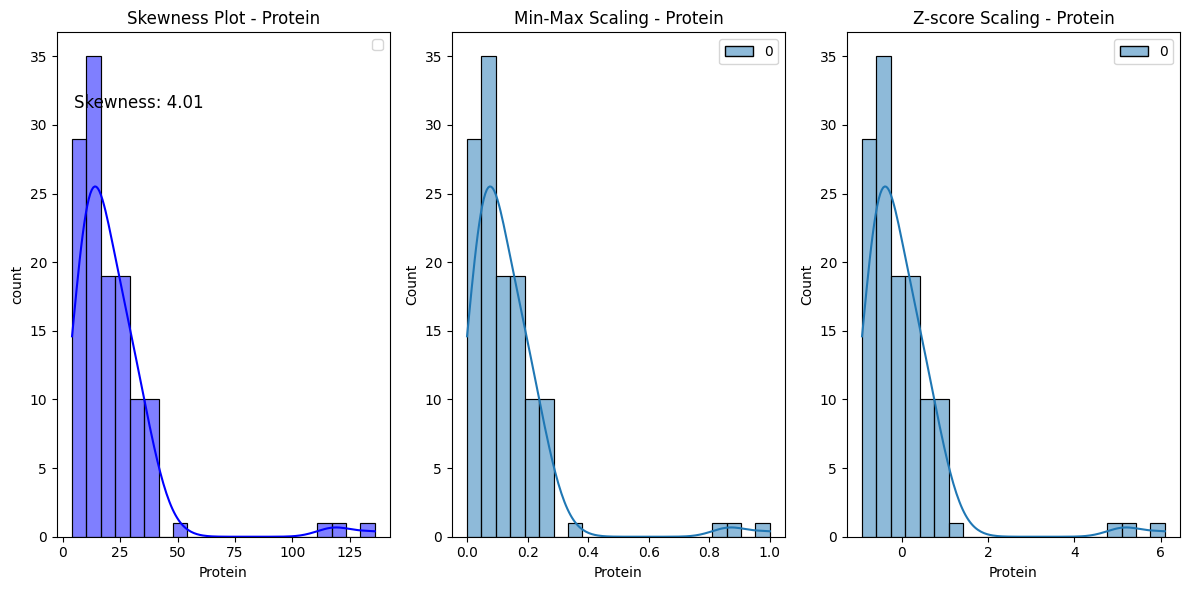

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import logging, sys
from scipy.stats import shapiro
logging.disable(sys.maxsize)

# Baca data dari file CSV
file_path = "Menu_MCD.csv"
data = pd.read_csv(file_path, on_bad_lines="skip",
                     engine="python", sep=',', encoding='latin-1')

# Pilih kolom numerik untuk dianalisis
numeric_columns = data.select_dtypes(include=[float, int]).columns


# Buat skewness plot untuk setiap kolom numerik sebelum normalisasi
for column in numeric_columns:
    # Hitung skewness
    skewness_value = data[column].skew()

    # Buat skewness plot sebelum normalisasi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='blue', edgecolor='black')
    plt.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
    plt.title(f'Skewness Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('count')

    # Tampilkan legenda
    plt.legend()

    # Transformasi Min-Max Scaling
    min_max_scaler = MinMaxScaler()
    data_min_max = min_max_scaler.fit_transform(data[[column]])

    # Buat histogram untuk data setelah Min-Max Scaling
    plt.subplot(1, 3, 2)
    sns.histplot(data_min_max, kde=True, color='green', edgecolor='black')
    plt.title(f'Min-Max Scaling - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # Transformasi Z-score Scaling
    zscore_scaler = StandardScaler()
    data_zscore = zscore_scaler.fit_transform(data[[column]])

    # Buat histogram untuk data setelah Z-score Scaling
    plt.subplot(1, 3, 3)
    sns.histplot(data_zscore, kde=True, color='orange', edgecolor='black')
    plt.title(f'Z-score Scaling - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # Tampilkan plot
    plt.tight_layout()
    plt.show()



data sebelum di normalisasi
     Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0         430                210       23.0                         36   
1         460                230       26.0                         40   
2         520                270       30.0                         47   
3         410                180       20.0                         32   
4         470                220       25.0                         38   
..        ...                ...        ...                        ...   
121       510                150       17.0                         26   
122       690                200       23.0                         35   
123       340                100       11.0                         17   
124       810                290       32.0                         50   
125       410                150       16.0                         25   

     Saturated Fat  Saturated Fat (% Daily Value)  Cholesterol  \
0              9.

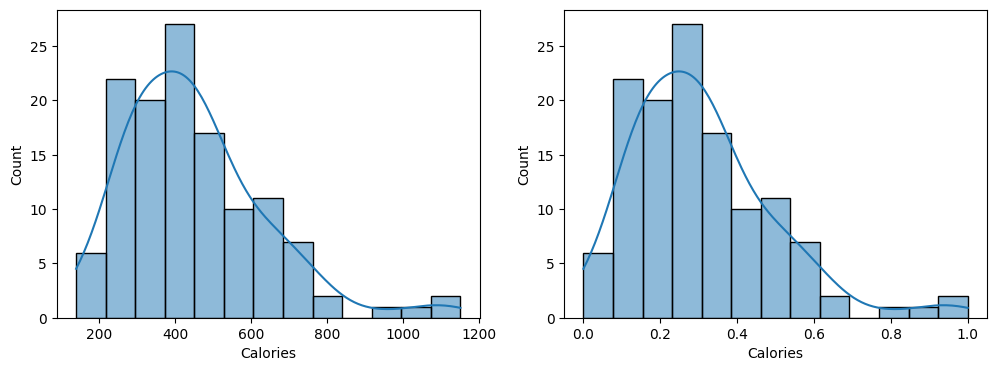

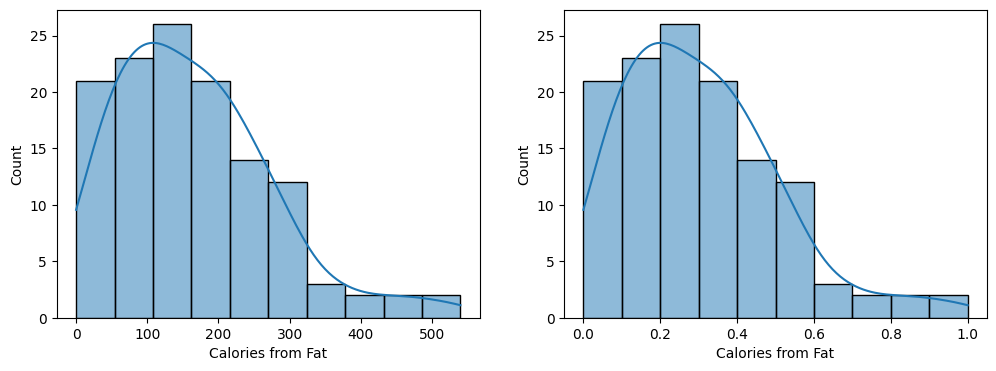

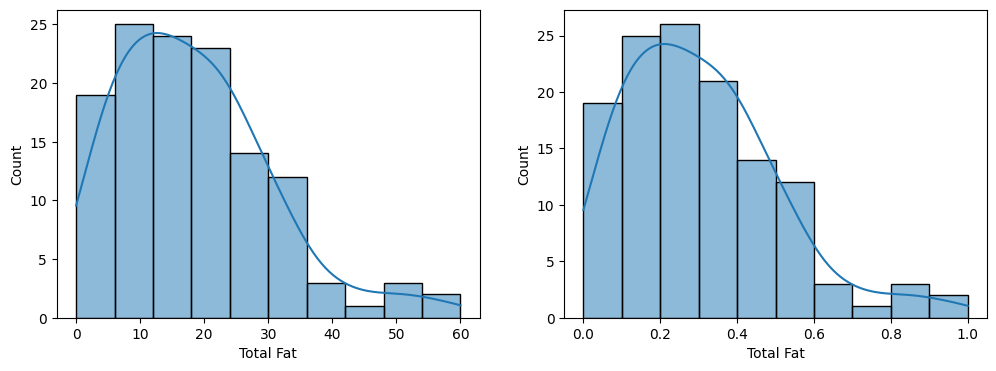

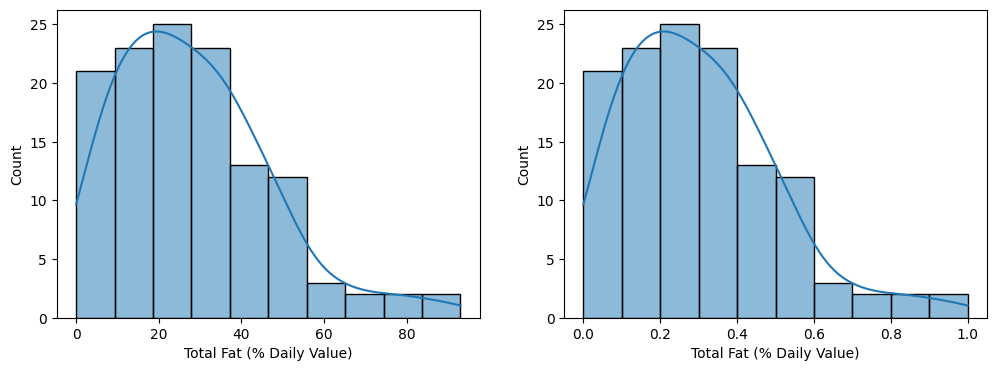

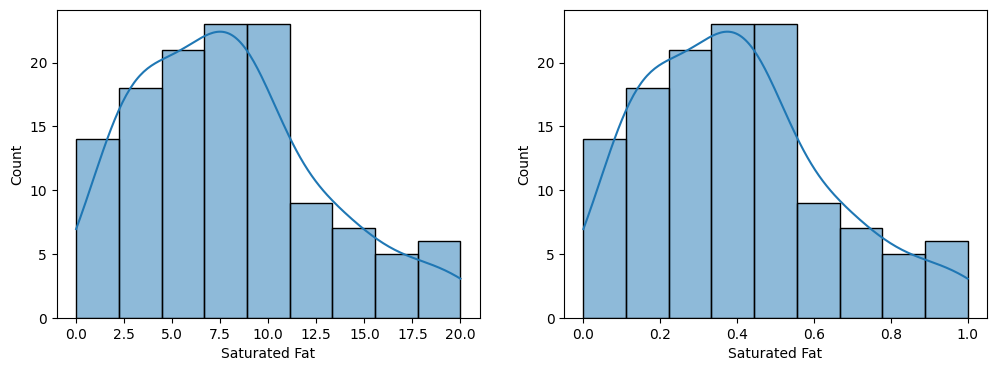

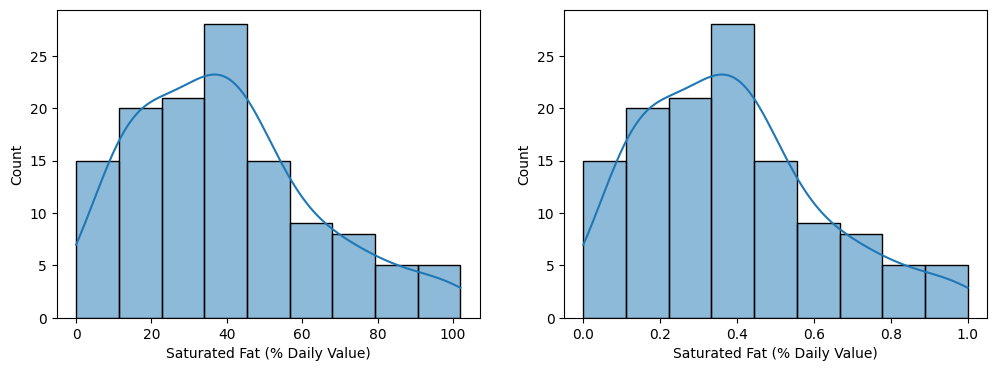

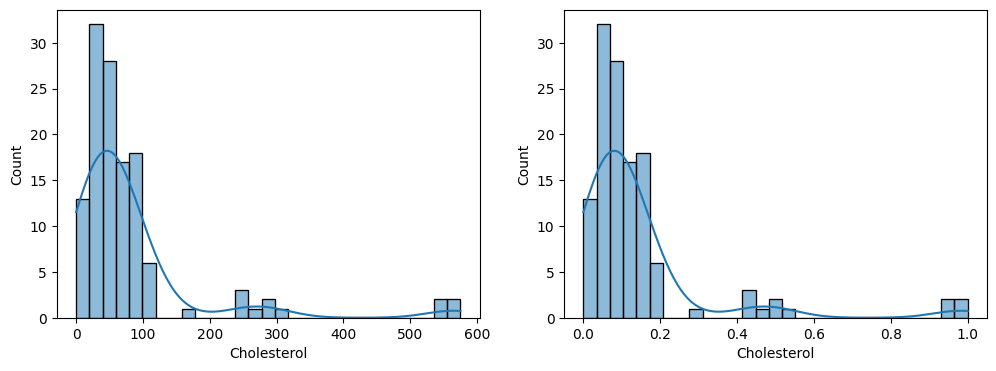

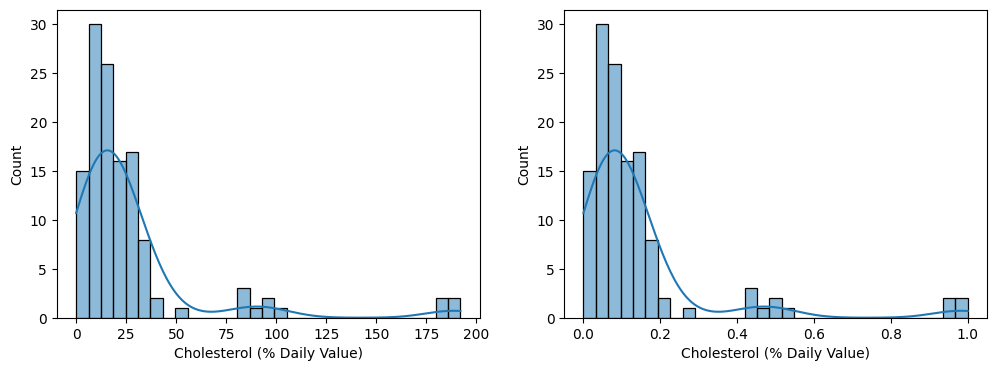

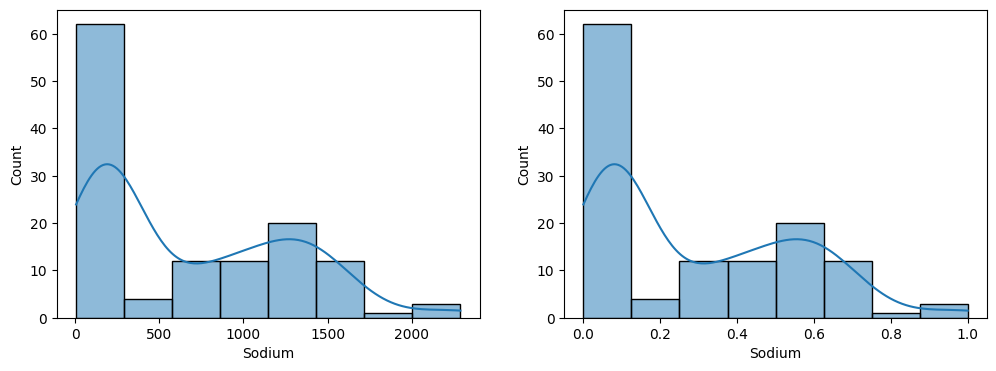

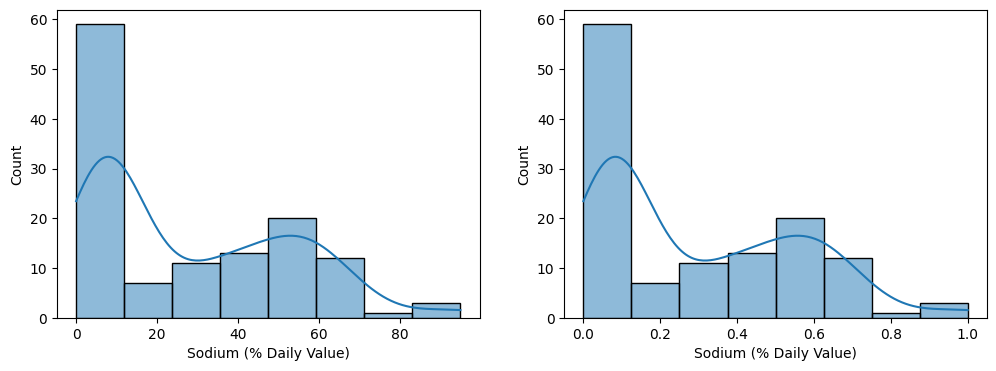

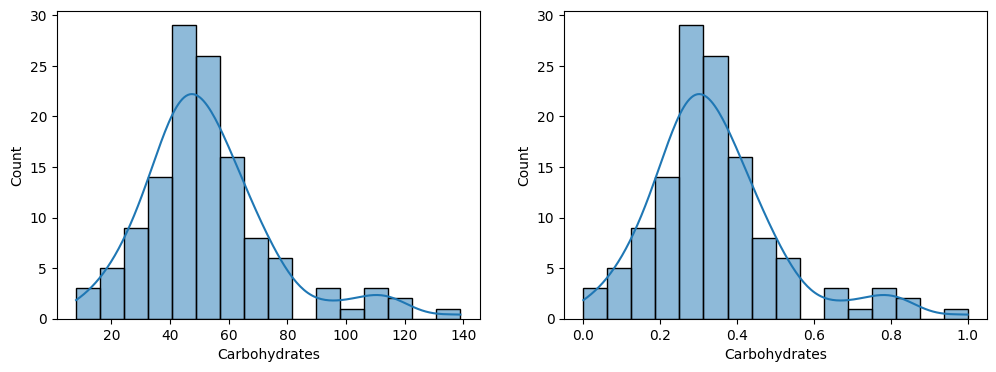

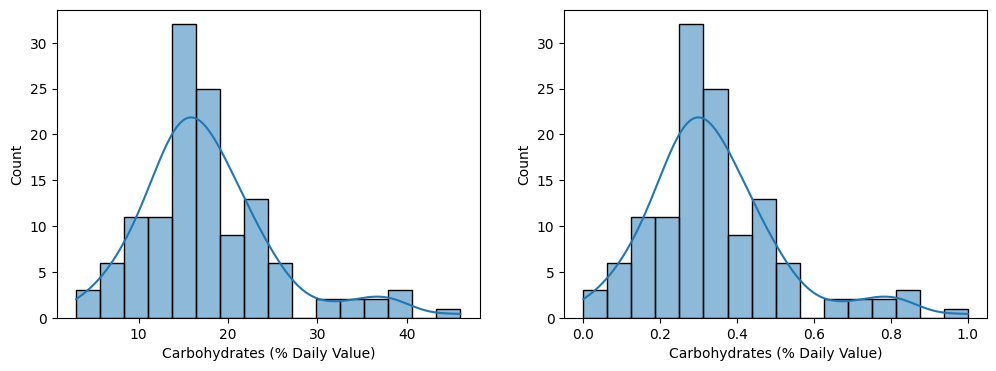

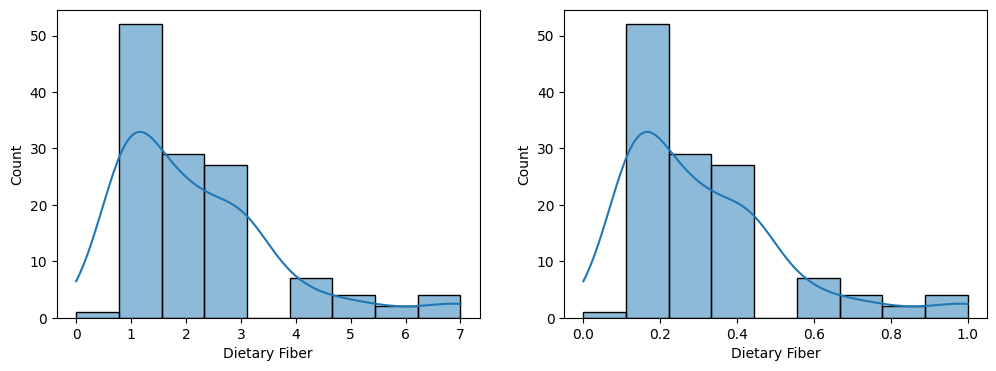

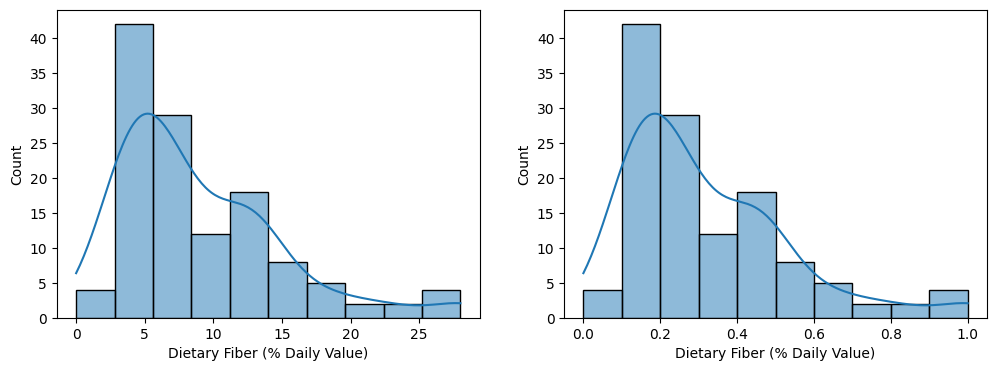

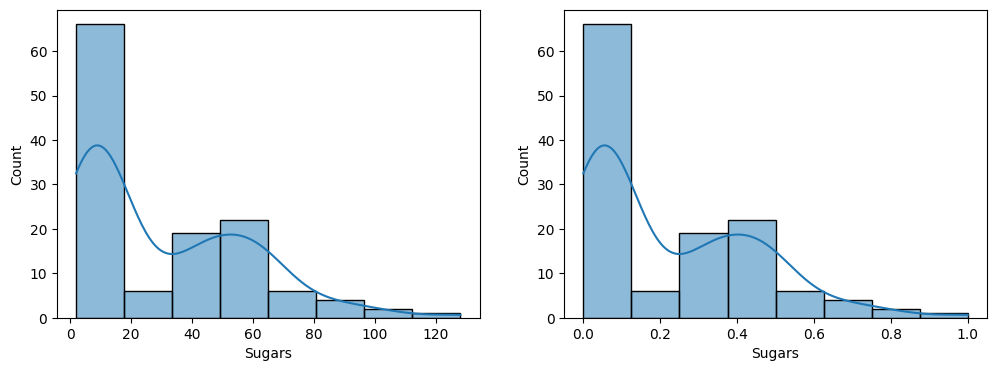

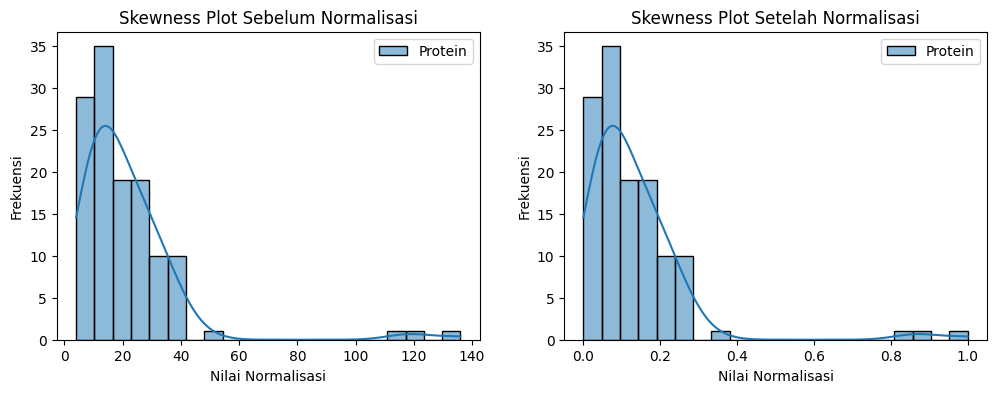

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# Baca data dari file CSV
file_path = "Menu_MCD.csv"
data = pd.read_csv(file_path, on_bad_lines="skip",
                     engine="python", sep=',', encoding='latin-1')

# Pilih kolom numerik untuk normalisasi
numeric_columns = data.select_dtypes(include=[float, int]).columns

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Menambahkan kolom "STATUS dan PRODUCTLINE" pada DataFrame yang sudah dinormalisasi
#data_normalized[['STATUS', 'PRODUCTLINE']] = data[['STATUS', 'PRODUCTLINE']]

# Menampilkan data setelah normalisasi dengan kolom "ORDERDATE" di depan
columns_order = [''] + [col for col in data_normalized.columns if col not in ['STATUS', 'PRODUCTLINE']]
data_normalized = data_normalized[columns_order[1:]]

#data sebelum di normalisasi
print("data sebelum di normalisasi")
print(data.select_dtypes(include=[float, int]))

# Tampilkan data setelah normalisasi
print("Data setelah normalisasi:")
print(data_normalized)

# Buat skewness plot untuk setiap kolom numerik pada DataFrame yang sudah dinormalisasi



for column in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(data_normalized[column], label=column, kde=True, ax=axes[1])
        sns.histplot(data[column], label=column, kde=True, ax=axes[0])

axes[1].set_title('Skewness Plot Setelah Normalisasi')
axes[0].set_title('Skewness Plot Sebelum Normalisasi')
axes[1].set_xlabel('Nilai Normalisasi')
axes[0].set_xlabel('Nilai Normalisasi')
axes[1].set_ylabel('Frekuensi')
axes[0].set_ylabel('Frekuensi')
axes[1].legend()
axes[0].legend()
plt.show()